Привет, Андрей! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". Если Тебе такой вариант не удобен, то пожалуйста дай знать. Я сразу перейду на "Вы".

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе Data Scientist. Однако, если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ❌</h2>
    
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>


<div class="alert alert-block alert-info">
Дополнительные материалы, выходящие за рамки программы.
</div>

## Ревью v. 1:

У Тебя в целом хорошая работа, но нужно внести исправления) К сожалению, в коде есть ошибка и это нужно исправить. После этого я смогу продолжить проверку проекта.

Жду проект на проверку:)

Успехов!

Студент: Привет, можно на 'ты'

# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [4]:
import logging
import os
import warnings

import numpy as np
import pandas as pd
import s3fs
from dotenv import load_dotenv
from implicit.als import AlternatingLeastSquares
from sklearn.metrics import mean_squared_error, mean_absolute_error, ndcg_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import scipy.sparse as sp
import scipy.stats as stats
from catboost import CatBoostClassifier, Pool
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
В соответствии с правилами оформления кода PEP8 импорты должны быть сгруппированы в следующем порядке:
* импорты из стандартной библиотеки
* импорты сторонних библиотек
* импорты модулей текущего проекта

Рекомендуется добавлять пустую строку между каждой группой импортов.

Подробные правила можно посмотреть: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-8
</div>

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [5]:
tracks = pd.read_parquet("tracks.parquet")
catalog_names = pd.read_parquet("catalog_names.parquet")
interactions = pd.read_parquet("interactions.parquet")

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Отлично, данные загружены.
</div>

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [6]:
tracks.head()

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [7]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [8]:
catalog_names.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [9]:
catalog_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [10]:
interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [11]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [12]:
interactions['user_id'].nunique()

1373221

In [13]:
# Проверка наличия пропущенных значений
print("Пропущенные значения в tracks:\n", tracks.isna().sum(), "\n")
print("Пропущенные значения в catalog_names:\n", catalog_names.isna().sum(), "\n")
print("Пропущенные значения в interactions:\n", interactions.isna().sum(), "\n")

Пропущенные значения в tracks:
 track_id    0
albums      0
artists     0
genres      0
dtype: int64 

Пропущенные значения в catalog_names:
 id      0
type    0
name    0
dtype: int64 

Пропущенные значения в interactions:
 user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64 



<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Да, пропусков в данных нет и это отлично)
</div>

In [14]:
def count_unknowns(df, column):
    unknown_mask = df[df[column].apply(len) == 0]
    return unknown_mask

unknown_albums = len(count_unknowns(tracks, 'albums'))
unknown_artists = len(count_unknowns(tracks, 'artists'))
unknown_genres = len(count_unknowns(tracks, 'genres'))

print(f"Треков с неизвестными альбомами: {unknown_albums}")
print(f"Треков с неизвестными исполнителями: {unknown_artists}")
print(f"Треков с неизвестными жанрами: {unknown_genres}")

Треков с неизвестными альбомами: 18
Треков с неизвестными исполнителями: 15369
Треков с неизвестными жанрами: 3687


In [15]:
# Проверка на наличие пустых списков
empty_albums = tracks[tracks['albums'].apply(len) == 0]
empty_artists = tracks[tracks['artists'].apply(len) == 0]
empty_genres = tracks[tracks['genres'].apply(len) == 0]

print(f"Треки с пустыми альбомами: {len(empty_albums)}")
print(f"Треки с пустыми исполнителями: {len(empty_artists)}")
print(f"Треки с пустыми жанрами: {len(empty_genres)}")

Треки с пустыми альбомами: 18
Треки с пустыми исполнителями: 15369
Треки с пустыми жанрами: 3687


# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

В interactions нужно сбросить индекс, так как для каждого пользователя он начинается с 0

In [16]:
interactions = interactions.reset_index(drop=True)

In [17]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222629898 entries, 0 to 222629897
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 3.7 GB


Проблемы с данными:  
Треки с пустыми альбомами: 18  
Треки с пустыми исполнителями: 15369  
Треки с пустыми жанрами: 3687  

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Молодец, что вывел статистику по трекам
</div>

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

Статистика прослушиваний по пользователям:
count    1.373221e+06
mean     1.621224e+02
std      3.512846e+02
min      1.000000e+00
25%      2.300000e+01
50%      5.500000e+01
75%      1.540000e+02
max      1.663700e+04
Name: listen_count, dtype: float64


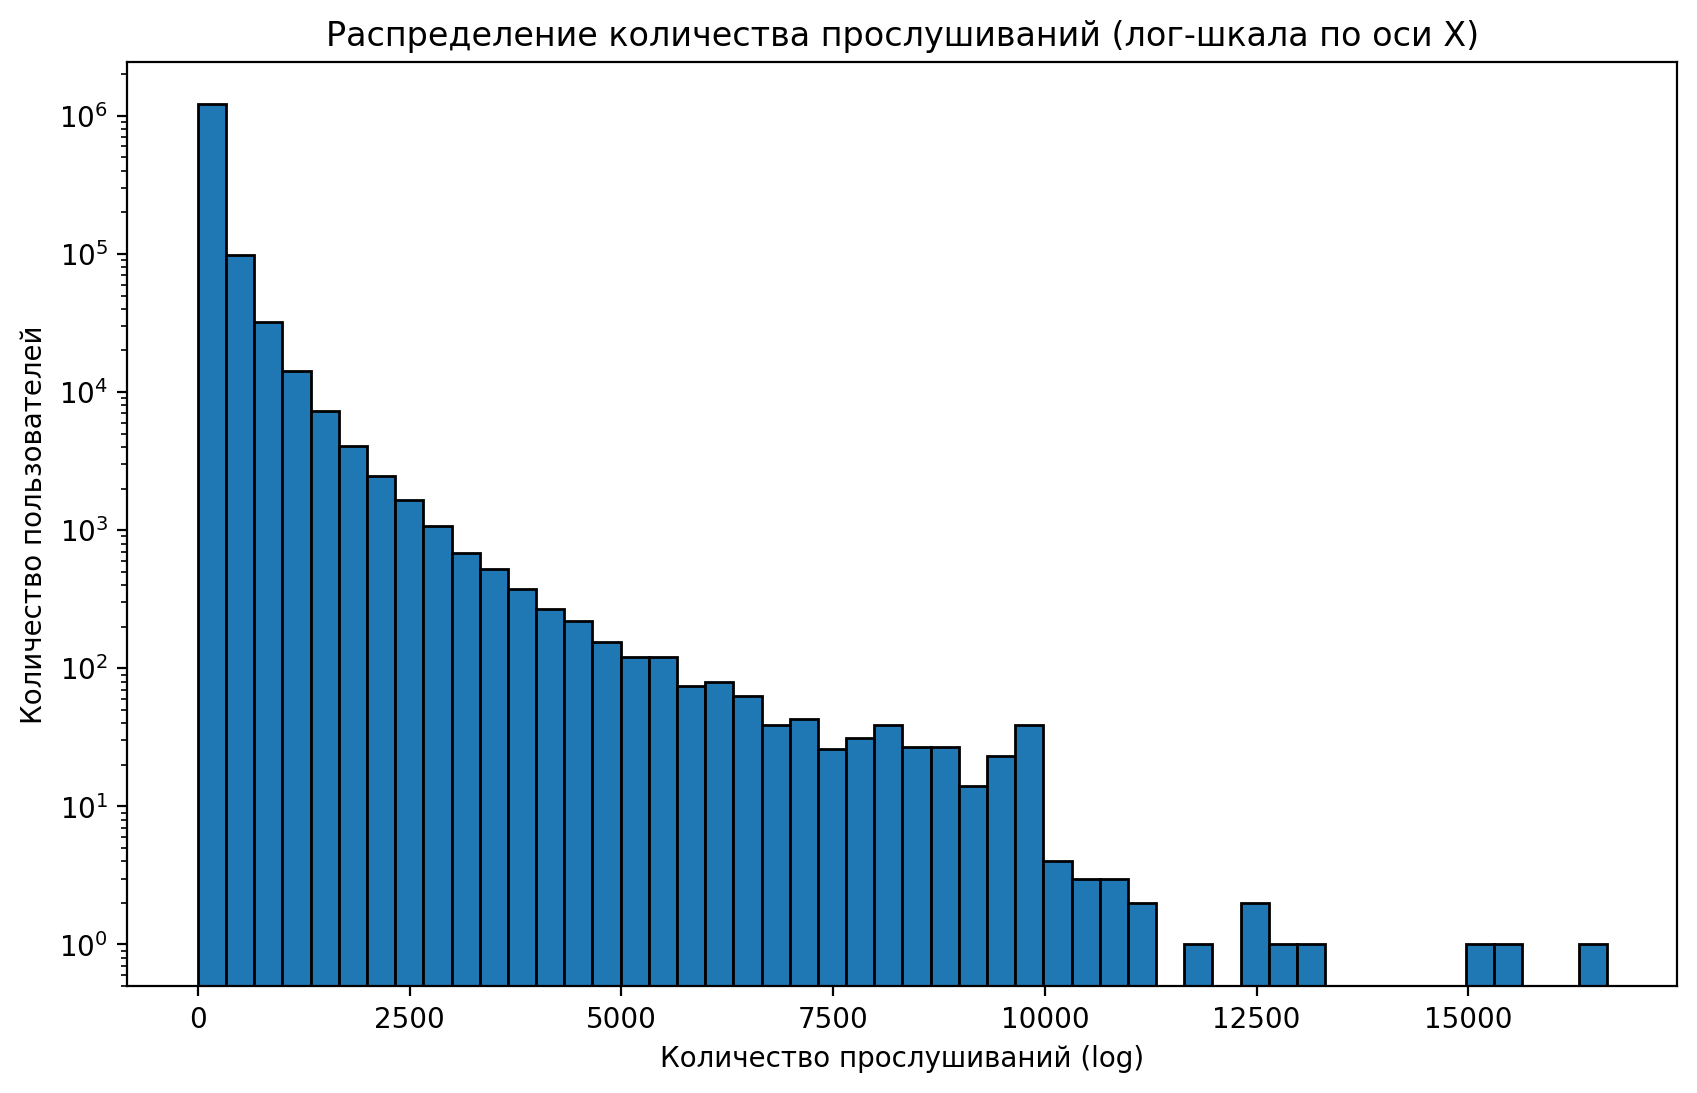

In [18]:
user_listen_counts = interactions.groupby('user_id').size().reset_index(name='listen_count')
print("Статистика прослушиваний по пользователям:")
print(user_listen_counts['listen_count'].describe())

plt.figure(figsize=(10, 6))
plt.hist(user_listen_counts['listen_count'], bins=50, edgecolor='black', log=True)
plt.title("Распределение количества прослушиваний (лог-шкала по оси X)")
plt.xlabel("Количество прослушиваний (log)")
plt.ylabel("Количество пользователей")
plt.show()

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Молодец, что используешь `.groupby()`. Но часто удобным вариантов для создания сводной таблицы является .pivot_table, так как предоставляет большие возможности по формированию сводной таблицы.
    
Подробнее про создание сводных таблиц с помощью .pivot_table написано в https://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html
</div>

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
По части оформления графика все ок - подписи по осям есть и здорово, что добавил заголовок к графику.
</div>

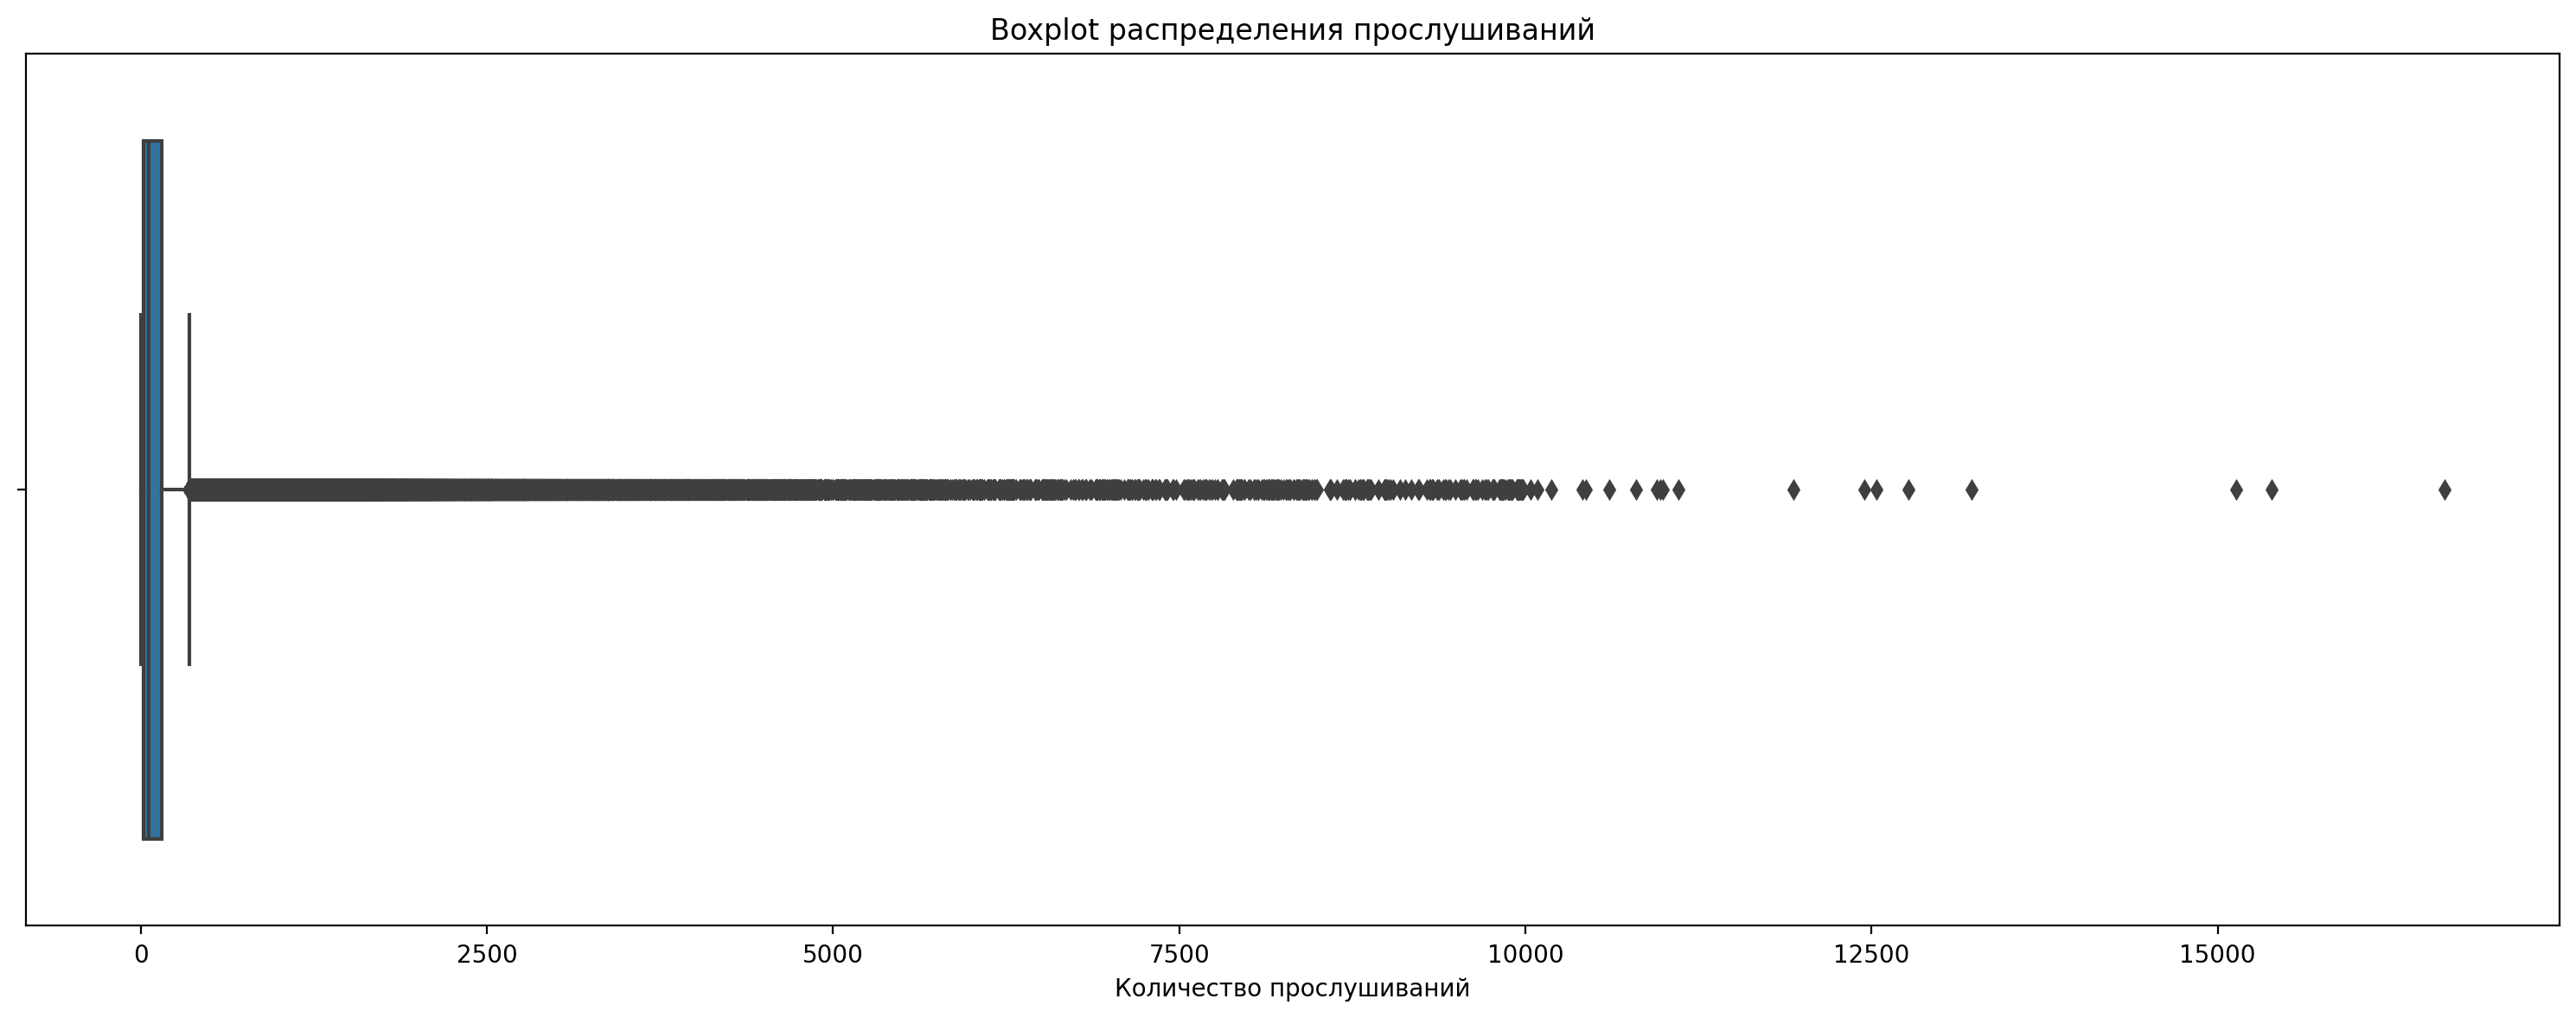

In [19]:
# Подсчет количества прослушиваний для каждого пользователя
user_listen_counts = interactions.groupby('user_id').size().reset_index(name='listen_count')


plt.figure(figsize=(15, 6))

sns.boxplot(x=user_listen_counts['listen_count'])
plt.title("Boxplot распределения прослушиваний")
plt.xlabel("Количество прослушиваний")

plt.tight_layout()
plt.show()

In [20]:
# Анализ распределения
# Коэффициент асимметрии (skewness)
skewness = user_listen_counts['listen_count'].skew()
print(f"\nКоэффициент асимметрии (skewness): {skewness:.2f}")

# Коэффициент эксцесса (kurtosis)
kurtosis = user_listen_counts['listen_count'].kurtosis()
print(f"Коэффициент эксцесса (kurtosis): {kurtosis:.2f}")

# Определение выбросов по методу межквартильного размаха (IQR)
Q1 = user_listen_counts['listen_count'].quantile(0.25)
Q3 = user_listen_counts['listen_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Подсчет выбросов
outliers = user_listen_counts[(user_listen_counts['listen_count'] < lower_bound) | 
                               (user_listen_counts['listen_count'] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Доля выбросов: {len(outliers) / len(user_listen_counts) * 100:.2f}%")

# Проверка на нормальность распределения
_, p_value = stats.normaltest(user_listen_counts['listen_count'])
print(f"\nТест на нормальность распределения (p-value): {p_value:.4f}")


Коэффициент асимметрии (skewness): 8.56
Коэффициент эксцесса (kurtosis): 136.82

Количество выбросов: 154853
Доля выбросов: 11.28%

Тест на нормальность распределения (p-value): 0.0000


Анализ распределения прослушиваний пользователей  
Ключевые характеристики  

Среднее: 162 прослушивания  
Медиана: 55 прослушиваний  
Максимум: 16,637 прослушиваний  

Особенности распределения  

Асимметрия (skewness = 8.56): Сильное смещение вправо  
Эксцесс (kurtosis = 136.82): Очень заостренное распределение  
Выбросы: 154,853 пользователя (11.28% от общего числа)  

Основной вывод  
Распределение прослушиваний крайне неоднородное. Большинство пользователей имеют низкую активность, при этом существует небольшая группа с extremely высоким числом прослушиваний.

<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
Ты построил отличную гистограмму распределения, но её нужно проанализировать. Анализ графиков и формулировка выводов это важная часть работы. Для распределений можно проанализировать тип распределения, наличие “хвостов”, “скошенность” распределения и т. д.

Помимо, этого было бы здорово добавить "ящики с усами". Для “ящиков с усами” имеет смысл проанализировать границы выбросов и есть ли аномальные значений в данных.

Дополнительные материалы по “ящикам с усами”: https://builtin.com/data-science/boxplot

Подробнее про типы распределений можно посмотреть: https://machinelearningmastery.com/statistical-data-distributions/
</div>

Наиболее популярные треки

In [21]:
track_counts = interactions.groupby('track_id').size().reset_index(name='play_count')
popular_tracks = track_counts.sort_values(by='play_count', ascending=False).head(10)
print("Наиболее популярные треки:")
print(popular_tracks)

Наиболее популярные треки:
        track_id  play_count
9098       53404      111062
483876  33311009      106921
26665     178529      101924
512157  35505245       99490
829320  65851540       86670
368072  24692821       86246
475289  32947997       85886
696106  51241318       85244
90461     795836       85042
647237  45499814       84748


<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Групировка данных и расчёт популярности треков выполнены верно и молодец, что отсортировал треки в порядке уменьшения их популярности.
</div>

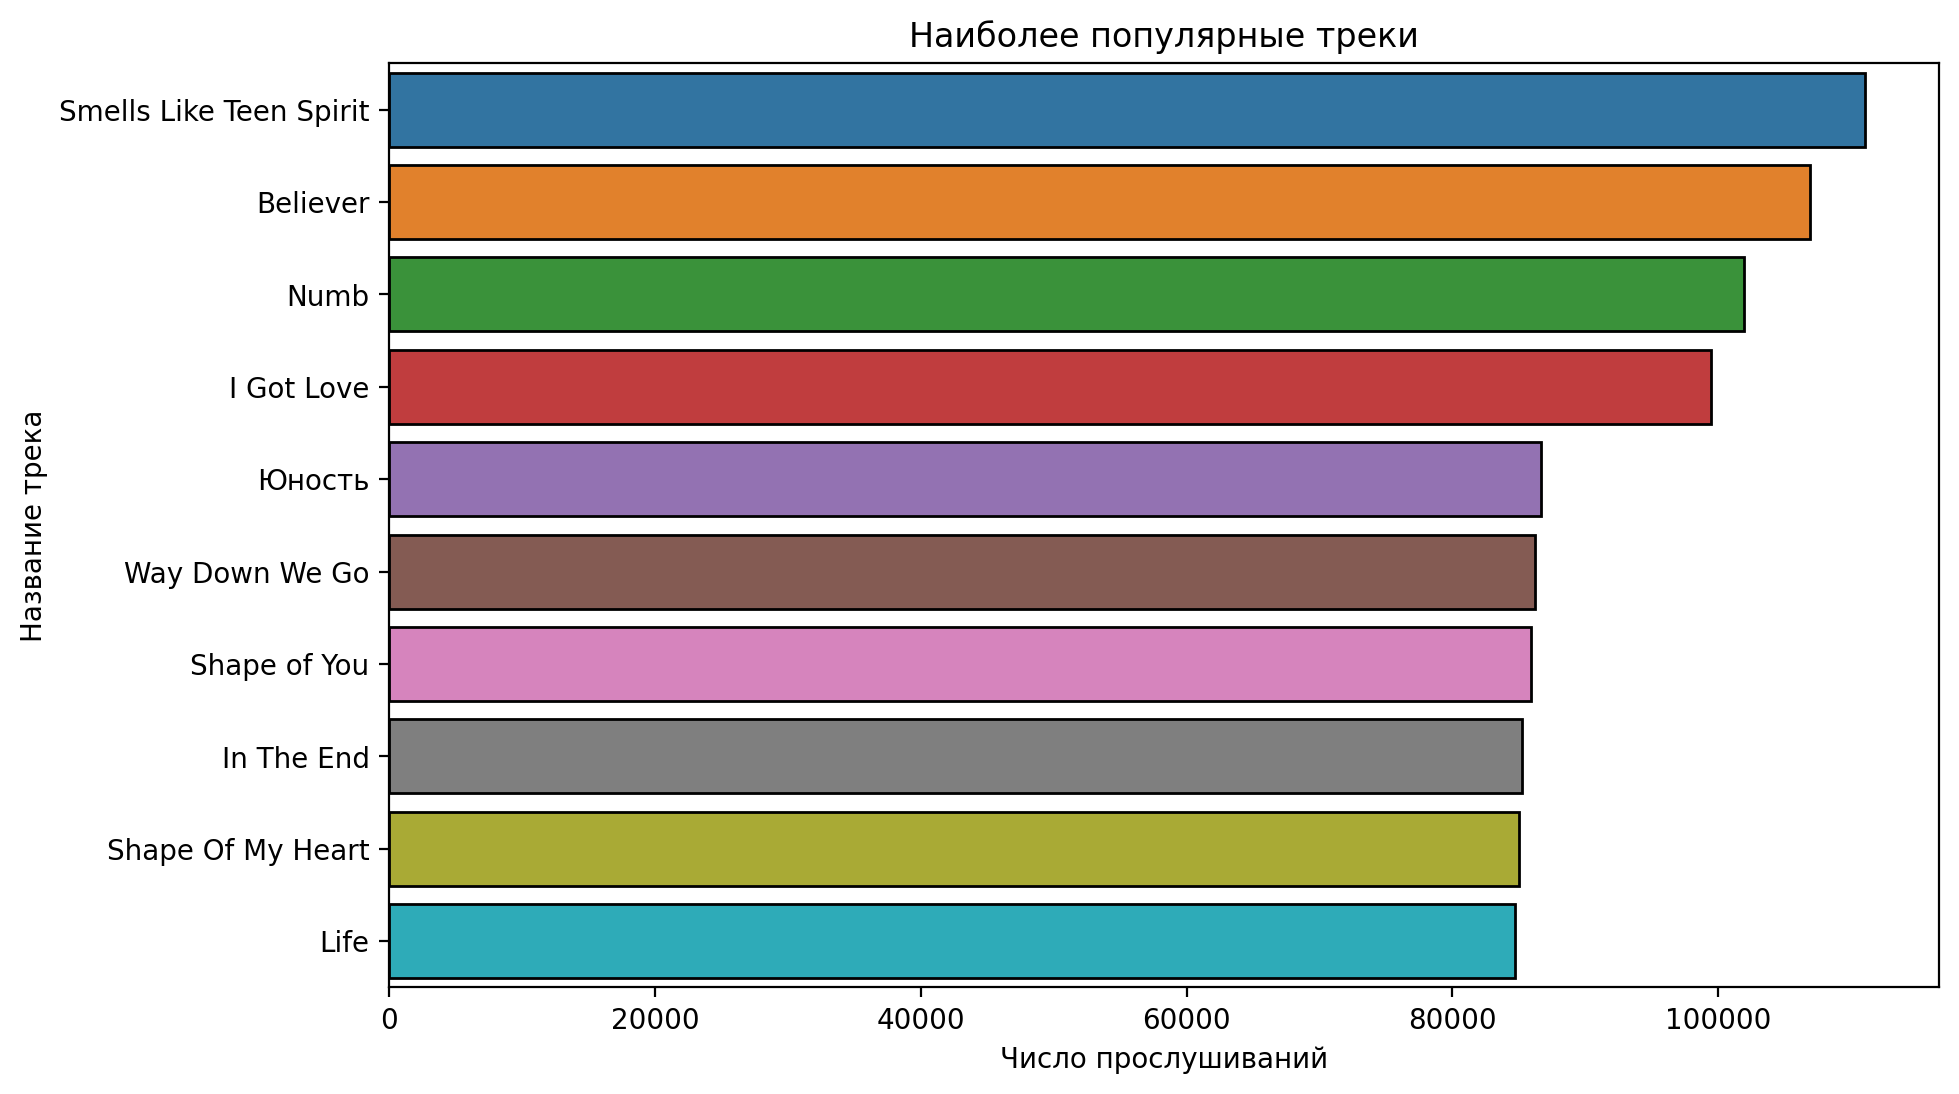

In [22]:
tracks_info = catalog_names.query("type == 'track'").rename(columns={'id': 'track_id', 'name': 'track_name'})
popular_tracks_named = popular_tracks.merge(tracks_info[['track_id', 'track_name']], on='track_id', how='left')
popular_tracks_named['track_name'] = popular_tracks_named['track_name'].fillna("Unknown")

plt.figure(figsize=(10, 6))
sns.barplot(data=popular_tracks_named, x='play_count', y='track_name', edgecolor='black')
plt.title("Наиболее популярные треки")
plt.xlabel("Число прослушиваний")
plt.ylabel("Название трека")
plt.show()

<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
Вывод warnings можно убрать с помощью:

import warnings

warnings.filterwarnings("ignore")
</div>

Наиболее популярные жанры

In [23]:
# Группировка interactions по track_id, считаем прослушивания
track_plays = interactions.groupby('track_id').size().reset_index(name='play_count')

# Объединение с таблицей треков и заменяем пропуски в play_count на 0
tracks_merged = tracks.merge(track_plays, on='track_id', how='left').fillna({'play_count': 0})

# Разворачиваем genres
tracks_exploded = tracks_merged.explode('genres').dropna(subset=['genres'])
tracks_exploded['genres'] = tracks_exploded['genres'].astype(str)  # Оставляем как str

# Добавляем названия жанров из catalog_names
genre_names = catalog_names.query("type == 'genre'")[['id', 'name']].rename(columns={'id': 'genres', 'name': 'genre_name'})
genre_names['genres'] = genre_names['genres'].astype(str)

# Подсчёт прослушиваний по жанрам и объединение с названиями
genre_counts_named = (
    tracks_exploded
    .groupby('genres')['play_count'].sum().reset_index()
    .merge(genre_names, on='genres', how='left')
)

# Топ-10 жанров
popular_genres = genre_counts_named.sort_values(by='play_count', ascending=False).head(10)

print("Наиболее популярные жанры:")
print(popular_genres[['genres', 'genre_name', 'play_count']])

Наиболее популярные жанры:
    genres   genre_name  play_count
11      11          pop    55578312
144     75          rap    37799821
4      102      allrock    31092013
72      20       ruspop    26626241
84       3       rusrap    25303695
133     68  electronics    20120981
56      16        dance    16291557
71       2      rusrock    13166147
40      14         rock    12772644
108     47        metal    12437375


<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
Да, пропуски в столбце `play_count` можно заменить на 0. Но было бы здорово это прокоммментировать.
</div>

Треки, которые никто не прослушал

In [24]:
unheard_tracks = tracks[~tracks['track_id'].isin(interactions['track_id'])]
print(f"Количество непрослушенных треков: {len(unheard_tracks)}")

Количество непрослушенных треков: 0


<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Да, верно, треков которые никто не прослушивал нет, что вполне логично:)
</div>

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [25]:
# Копирование исходных данных с новыми именами
items = tracks.copy()
events = interactions.copy()

# Оставляем только пользователей с >=2 событиями
user_counts = events.groupby('user_id').size()
valid_users = user_counts[user_counts >= 2].index
events = events[events['user_id'].isin(valid_users)].copy()

# Оставляем топ-25 треков для каждого юзера
events = events.query("track_seq <= 25")

# названия треков из catalog_names
track_names = (
    catalog_names
    .query("type == 'track'")[['id', 'name']]
    .rename(columns={'id': 'track_id', 'name': 'track_name'})
)
items = items.merge(track_names, on='track_id', how='left')
items['track_name'] = items['track_name'].fillna("Unknown")

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Да, метод `.query()` удобный инструмент для фильтрации данных. 👍👍👍
    
Дополнителньо можно посмотреть: https://medium.com/@Bloomore/tips-and-trick-for-pandas-querying-eccdd84215e6
</div>

In [26]:
events.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [27]:
items.head()

,track_id,albums,artists,genres,track_name
0,26,"[3, 2490753]",[16],"[11, 21]",Complimentary Me
1,38,"[3, 2490753]",[16],"[11, 21]",Momma's Boy
2,135,"[12, 214, 2490809]",[84],[11],Atticus
3,136,"[12, 214, 2490809]",[84],[11],24 Hours
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11],Don't Upset The Rhythm (Go Baby Go)


<div class="alert alert-block alert-warning">
<h2> Комментарий ревьюера ⚠️</h2>
    
    
Да, объединение данных выполнено верно и молодец, что проверил корректность соединения данных. Но для проверки правильности соединения данных достаточно вывестинесколько первых, последних или случайно выбранных строк. Вывод всех строк датафрейма сильно загромождает вывод данных и перегружает ядро ноутбука.
</div>

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [28]:
items.to_parquet('items.parquet')
events.to_parquet('events.parquet')

In [29]:
load_dotenv(override=True)

S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"

creds = {
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "endpoint_url": S3_ENDPOINT_URL
}

s3_items_path = f"s3://{S3_BUCKET_NAME}/recsys/data/items.parquet"
s3_events_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events.parquet"

items.to_parquet(s3_items_path, index=False, storage_options=creds)
events.to_parquet(s3_events_path, index=False, storage_options=creds)

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Отлично, запись данных выполнена и молодец, что указал параметр `index=False` при записи данных. Это позволи избежать записи индекса как отдельного столбца.
</div>

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [30]:
# Удаление ненужных переменных, если они существуют
for var_name in ['interactions', 'catalog_names', 'tracks']:
    if var_name in globals():
        del globals()[var_name]

# Принудительная сборка мусора
import gc
gc.collect()

print("Память очищена. Если наблюдаются проблемы с ресурсами, рекомендуется перезапустить kernel.")

Память очищена. Если наблюдаются проблемы с ресурсами, рекомендуется перезапустить kernel.


<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера ✔️</h2>
    
Да, очистку оперативной памяти нужно выполнить 👍👍👍
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера ❌</h2>
    
К сожалению, в коде возникла ошибка и это нужно исправить. После этого я смогу продолжить проверку проекта.
</div>

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [31]:
load_dotenv()

S3_BUCKET_NAME = os.getenv("S3_BUCKET_NAME")
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

S3_ENDPOINT_URL = "https://storage.yandexcloud.net"

creds = {
    "key": AWS_ACCESS_KEY_ID,
    "secret": AWS_SECRET_ACCESS_KEY,
    "endpoint_url": S3_ENDPOINT_URL
}

s3_items_path = f"s3://{S3_BUCKET_NAME}/recsys/data/items.parquet"
s3_events_path = f"s3://{S3_BUCKET_NAME}/recsys/data/events.parquet"

try:
    # Проверяем есть ли данные в системе
    items
    events
    print("Данные уже загружены в среду.")
except (NameError, UnboundLocalError):
    # Если нет, то грузим из S3
    print("Загрузка items с S3...")
    items = pd.read_parquet(s3_items_path, storage_options=creds)
    events = pd.read_parquet(s3_events_path, storage_options=creds)

Данные уже загружены в среду.


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [32]:
# Разделяем по дате: 2022-12-16
train_test_global_time_split_date = pd.to_datetime("2022-12-16")

In [33]:
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

In [34]:
# количество пользователей в train и test
users_train = events_train["user_id"].unique()
users_test = events_test["user_id"].unique()
# количество пользователей, которые есть и в train, и в test
common_users = set(users_train) & set(users_test)

In [35]:
print(len(users_train), len(users_test), len(common_users)) 

1341756 270687 240071


In [36]:
# Предположим, users_test и users_train - это numpy.ndarray
users_test = pd.Series(users_test)
users_train = pd.Series(users_train)

# Теперь можно использовать isin
cold_users = users_test[~users_test.isin(users_train)]
print("Количество 'холодных' пользователей: ", len(cold_users))

Количество 'холодных' пользователей:  30616


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [37]:
top_pop_start_date = pd.to_datetime("2020-01-01").date()

In [38]:
# Будем брать популярные с 2020-01-01
item_popularity = events_train \
    .query("started_at >= @top_pop_start_date") \
    .groupby(["track_id"]).agg(user_id=("user_id", "nunique"), avg_track_seq=("track_seq", "mean")).reset_index()

In [39]:
scaler = MinMaxScaler()
item_popularity[["users_norm", "avg_track_seq_norm"]] = scaler.fit_transform(
    item_popularity[["user_id", "avg_track_seq"]]
)

# вычисляем track_seq, как скор популярности со штрафом за низкий рейтинг
item_popularity["track_seq"] = (
    item_popularity["users_norm"] * item_popularity["avg_track_seq_norm"]
)

# сортируем по убыванию track_seq
item_popularity = item_popularity.sort_values("track_seq", ascending=False)

# выбираем первые 100 айтемов со средней оценкой avg_track_seq
top_k_pop_items = item_popularity.head(100)

# добавляем информацию о треках
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("track_id")[["albums", "artists", "genres"]], on="track_id")

In [40]:
top_k_pop_items.head()

,track_id,user_id,avg_track_seq,users_norm,avg_track_seq_norm,track_seq,albums,artists,genres
0,53404,89298,7.979361,1.000000,0.290807,0.290807,"[4367, 89708, 294911, 294912, 294914, 297393, ...",[9262],"[13, 14, 102]"
1,178529,60632,9.766427,0.678981,0.365268,0.248010,"[18113, 21924, 21940, 488052, 10009799]",[36800],"[41, 47]"
2,37384,67633,7.483063,0.757383,0.270128,0.204590,"[3096, 5728, 5875, 6720, 8501, 59912, 67440, 8...",[7444],"[14, 102]"
3,48951,54797,8.585871,0.613638,0.316078,0.193957,"[4026, 73236, 135075, 135076, 169120, 2338182,...",[1859],"[14, 59, 102]"
4,328683,37560,10.994143,0.420608,0.416423,0.175151,"[33097, 51813, 67465, 2055847, 8850751, 885075...",[110173],"[13, 14, 102]"


In [41]:
# Сохраняем в s3
s3_top_popular_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/top_popular.parquet"
top_k_pop_items.to_parquet(s3_top_popular_path, storage_options=creds, index=False)

In [42]:
# Сохраняем локально
top_k_pop_items.to_parquet('top_popular.parquet')

In [43]:
# Выделяем холодных пользователей с рекоммендациями
cold_users_events_with_recs = \
    events_test[events_test["user_id"].isin(cold_users)] \
    .merge(top_k_pop_items[["track_id", "avg_track_seq"]], on="track_id", how="left")

In [44]:
# Убираем пользователей с пустым avg_track_seq
cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["avg_track_seq"].isnull()
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx] \
    [["user_id", "track_id", "track_seq", "avg_track_seq"]]

# Персональные

Рассчитаем персональные рекомендации.

In [45]:
# Перекодируем user_id

user_encoder = LabelEncoder()
user_encoder.fit(events_train["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])

In [46]:
# Перекодируем item_id

item_encoder = LabelEncoder()
item_encoder.fit(items["track_id"])
items["track_id_enc"] = item_encoder.transform(items["track_id"])
events_train["track_id_enc"] = item_encoder.transform(events_train["track_id"])

In [47]:
# sparse-матрица
user_item_matrix_train = sp.csr_matrix((
    np.ones(len(events_train)),  # все взаимодействия равны 1
    (events_train["user_id_enc"], events_train["track_id_enc"])
))

In [48]:
# Инициализируем и обучаем ALS-модель
als_model = AlternatingLeastSquares(
    factors=30, 
    iterations=20, 
    regularization=0.05, 
    random_state=42
)

als_model.fit(user_item_matrix_train)

100%|██████████| 20/20 [04:41<00:00, 14.08s/it]


In [49]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded],
    filter_already_liked_items=False, 
    N=50
)

In [50]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "track_seq": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "track_seq"], ignore_index=True)

In [51]:
# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["track_seq"] = als_recommendations["track_seq"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["track_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [52]:
als_recommendations.head()

,track_seq,user_id,track_id
0,0.038449,0,582507
1,0.014921,0,732401
2,0.014681,0,137670
3,0.014157,0,9047114
4,0.014026,0,560473


In [53]:
als_recommendations.to_parquet("personal_als.parquet")

In [54]:
# Сохраняем в s3
s3_top_popular_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/personal_als.parquet"
top_k_pop_items.to_parquet(s3_top_popular_path, storage_options=creds, index=False)

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [55]:
# получим энкодированные идентификаторы всех объектов, известных нам из events_train
train_item_ids_enc = events_train['track_id_enc'].unique()

max_similar_items = 10

# получаем списки похожих объектов, используя ранее полученную ALS-модель
# метод similar_items возвращает и сам объект, как наиболее похожий
# этот объект мы позже отфильтруем, но сейчас запросим на 1 больше
similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items+1)

# преобразуем полученные списки в табличный формат
sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

similar_items = pd.DataFrame({
    "item_id_enc": train_item_ids_enc,
    "sim_item_id_enc": sim_item_item_ids_enc.tolist(), 
    "track_seq": sim_item_scores.tolist()  # преобразуем массив оценок в список
})
similar_items = similar_items.explode(["sim_item_id_enc", "track_seq"])  # разворачиваем списки в отдельные строки

# приводим типы данных
similar_items["sim_item_id_enc"] = similar_items["sim_item_id_enc"].astype("int")  # преобразуем в целые числа
similar_items["track_seq"] = similar_items["track_seq"].astype("float")

# получаем изначальные идентификаторы
similar_items["item_id_1"] = item_encoder.inverse_transform(similar_items["item_id_enc"])  # декодируем первый ID
similar_items["item_id_2"] = item_encoder.inverse_transform(similar_items["sim_item_id_enc"])  # декодируем второй ID
similar_items = similar_items.drop(columns=["item_id_enc", "sim_item_id_enc"])

# убираем пары с одинаковыми объектами
similar_items = similar_items.query("item_id_1 != item_id_2")

In [56]:
similar_items.head()

,track_seq,item_id_1,item_id_2
0,0.979057,99262,99245
0,0.971914,99262,99257
0,0.954317,99262,274379
0,0.952809,99262,99254
0,0.952635,99262,99241


In [57]:
similar_items.to_parquet("similar.parquet") 

In [58]:
# Сохраняем в s3
s3_top_popular_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/similar.parquet"
top_k_pop_items.to_parquet(s3_top_popular_path, storage_options=creds, index=False)

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [59]:
events_labels = events_test.copy()

events_labels["target"] = 1

candidates = als_recommendations.merge(
    events_labels[["user_id", "track_id", "target"]],
    on=["user_id", "track_id"],
    how="left"
)
candidates["target"] = candidates["target"].fillna(0).astype("int")

# в кандидатах оставляем только тех пользователей, у которых есть хотя бы один положительный таргет
candidates_to_sample = candidates.groupby("user_id").filter(
    lambda x: x["target"].sum() > 0
)

# для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),  # положительные примеры
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])

In [60]:
def get_user_features(events):
    """ считает пользовательские признаки """
    
    user_features = events.groupby("user_id").agg(
        listens_years=("started_at", lambda x: (x.max() - x.min()).days / 365.25),
        tracks_listen=("track_id", "nunique"), 
        rating_avg=("track_seq", "mean"),
        rating_std=("track_seq", "std")
    )
    
    user_features["tracks_per_year"] = user_features["tracks_listen"] / user_features["listens_years"]
    
    return user_features

In [61]:
# Добавляем новые фичи для обучающей и тестовой выборки

user_features_for_train = get_user_features(events_train)
user_features_for_test = get_user_features(events_test)

candidates_for_train_new_features = candidates_for_train.merge(
    user_features_for_train,
    on=["user_id"],
    how="left"
)

candidates_for_rank_new_features = candidates_for_train.merge(
    user_features_for_test,
    on=["user_id"],
    how="left"
    )

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [63]:
# задаём имена колонок признаков и таргета
features = [
    'track_seq', 
    'listens_years', 
    'tracks_listen', 
    'rating_avg', 
    'rating_std', 
    'tracks_per_year'
]

target = 'target'

# создаём Pool
train_data = Pool(
    data=candidates_for_train_new_features[features], 
    label=candidates_for_train_new_features[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0,
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6706911	total: 68.3ms	remaining: 1m 8s
100:	learn: 0.5747759	total: 970ms	remaining: 8.63s
200:	learn: 0.5727775	total: 1.89s	remaining: 7.5s
300:	learn: 0.5709971	total: 2.79s	remaining: 6.48s
400:	learn: 0.5692702	total: 3.71s	remaining: 5.55s
500:	learn: 0.5676935	total: 4.73s	remaining: 4.71s
600:	learn: 0.5661188	total: 5.63s	remaining: 3.74s
700:	learn: 0.5646174	total: 6.63s	remaining: 2.83s
800:	learn: 0.5632483	total: 7.53s	remaining: 1.87s
900:	learn: 0.5618804	total: 8.47s	remaining: 930ms
999:	learn: 0.5605007	total: 9.37s	remaining: 0us


In [64]:
# Предсказываем для тестовых пользователей с новыми признаками
inference_data = Pool(data=candidates_for_rank_new_features[features])
predictions = cb_model.predict_proba(inference_data)

candidates_for_rank_new_features["cb_score"] = predictions[:, 1]

# для каждого пользователя проставим rank, начиная с 1 — это максимальный cb_score
candidates_for_rank_new_features = candidates_for_rank_new_features.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_for_rank_new_features["rank"] = candidates_for_rank_new_features.groupby("user_id").cumcount() + 1

In [65]:
candidates_for_rank_new_features.to_parquet("recommendations.parquet")

In [66]:
# Сохраняем в s3
s3_path = f"s3://{S3_BUCKET_NAME}/recsys/recommendations/recommendations.parquet"
candidates_for_rank_new_features.to_parquet(s3_path, storage_options=creds, index=False)

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

Все выводы представлены ПОСЛЕ расчетов

Топ популярных:

In [67]:
# События "холодных" пользователей в events_test
cold_users_events = events_test[events_test["user_id"].isin(cold_users)]

# Общее количество событий "холодных" пользователей
total_cold_events = len(cold_users_events)

# Количество событий, где track_id есть в top_k_pop_items
matching_events = len(cold_users_events[cold_users_events["track_id"].isin(top_k_pop_items["track_id"])])

# Доля совпадений, округлённая до сотых
fraction = round(matching_events / total_cold_events, 2)

print(fraction)

0.06


In [68]:
# посчитаем метрики рекомендаций

rmse = mean_squared_error(cold_user_recs["track_seq"], cold_user_recs["avg_track_seq"], squared=False)
mae = mean_absolute_error(cold_user_recs["track_seq"], cold_user_recs["avg_track_seq"])
print(round(rmse, 2), round(mae, 2)) 

6.52 5.72


In [69]:
# посчитаем покрытие холодных пользователей рекомендациями

cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("avg_track_seq", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

Доля пользователей без релевантных рекомендаций: 0.51
Среднее покрытие пользователей: 0.12


персональных, полученных при помощи ALS:

In [70]:
def compute_ndcg(rating: pd.Series, score: pd.Series, k):

    """ Метрика оценки качества ранжирования
    rating: истинные оценки
    score: оценки модели
    k: количество айтемов (по убыванию score) для оценки, остальные - отбрасываются
    """
    
    # если кол-во объектов меньше 2, то NDCG - не определена
    if len(rating) < 2:
        return np.nan

    ndcg = ndcg_score(np.asarray([rating.to_numpy()]), np.asarray([score.to_numpy()]), k=k)

    return ndcg

In [71]:
als_recommendations_for_ndcg = (
    als_recommendations
    .merge(events_test[["user_id", "track_id", "track_seq"]].rename(columns={"track_seq": "track_seq_test"}),  
            on=["user_id", "track_id"], how="left")
)

In [72]:
track_seq_test_idx = ~als_recommendations_for_ndcg["track_seq_test"].isnull()
ndcg_at_5_scores = als_recommendations_for_ndcg[track_seq_test_idx].groupby("user_id").apply(lambda x: compute_ndcg(x["track_seq_test"], x["track_seq"], k=5))

In [73]:
print(ndcg_at_5_scores.mean())

0.9526582383846701


Итоговые:

In [80]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, track_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "track_seq"], ascending=[True, False])

    # оставляет только те track_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["track_id"].isin(events_train["track_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "track_id", "gt"]].merge(
        recs_for_common_users[["user_id", "track_id", "track_seq"]], 
        on=["user_id", "track_id"], how="outer")    

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["track_seq"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [81]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [82]:
top_binary_metrics = process_events_recs_for_binary_metrics(
    events_train,
    events_test, 
    candidates_for_rank_new_features, 
    top_k=5
)

In [83]:
precision_final, recall_final = compute_cls_metrics(top_binary_metrics.groupby('user_id').head(5))

In [84]:
precision_final, recall_final

(0.5754856588988546, 0.41473426983931955)

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

Топ популярных:  
- Только 6% "холодных" пользователей прослушали топ-треки. Это мало
- В среднем оценка места трека для пользователя отличается на 5.72. Не очень хороший результат.
- Доля пользователей без релевантных рекомендаций: 0.51
- Среднее покрытие пользователей: 0.12  
ALS:  
- NDCG@5 = 0.95 - очень высокое значение, близкое к 1  
i2i:  
- precision = 0.57  
- recall = 0.461 